1. In class we wrote code to get all of the links from the G77 statements website: https://www.g77.org/statement/index.php
Please write code that iterates through each of the links and formats them properly so that they are a readable url. Print them to the console.



In [1]:
#Your code here:
import nltk
import requests
from bs4 import BeautifulSoup 

In [5]:
# url of the webpage to scrape 
url = "https://www.g77.org/statement/" 
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser') 

# get all the a tags
links = soup.find_all('a')

for link in links:
    href = link.get('href')
    if href != "javascript:;" and href != "#": # Delete "javascript:;", "#"
        if href.startswith("#"):
            href = url + href
            print(href)
        else: # Change "/statement/getstatement.php?id=240219"so that it works as a link
            href = href.replace('/statement/', '')
            href = url + href
            print(href)

https://www.g77.org/statement/#jan
https://www.g77.org/statement/#jul
https://www.g77.org/statement/#feb
https://www.g77.org/statement/#aug
https://www.g77.org/statement/#mar
https://www.g77.org/statement/#sep
https://www.g77.org/statement/#apr
https://www.g77.org/statement/#oct
https://www.g77.org/statement/#may
https://www.g77.org/statement/#nov
https://www.g77.org/statement/#jun
https://www.g77.org/statement/#dec
https://www.g77.org/statement/getstatement.php?id=240219
https://www.g77.org/statement/getstatement.php?id=240215
https://www.g77.org/statement/getstatement.php?id=240212
https://www.g77.org/statement/getstatement.php?id=240208
https://www.g77.org/statement/getstatement.php?id=240207b
https://www.g77.org/statement/getstatement.php?id=240207
https://www.g77.org/statement/getstatement.php?id=240206b
https://www.g77.org/statement/getstatement.php?id=240206
https://www.g77.org/statement/getstatement.php?id=240205c
https://www.g77.org/statement/getstatement.php?id=240205b
https:

2. Now modify your code so that the urls are saved as a list. Iterate through the list, open each url, and extract the text from each, and save the text to a file called G77_2024.

In [21]:
#Your code here:

url = "https://www.g77.org/statement/" 

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser') 

# get all the "a" tags
links = soup.find_all('a')

href_list=[] # Initialize a list 
for link in links:
    href = link.get('href')
    if href != "javascript:;" and href != "#": # Delete "javascript:;", "#"
        if href.startswith("#"):
            href = url + href
            href_list.append(href) # Store links in the list 

        else: # Change "/statement/getstatement.php?id=240219"so that it works as a link
            href = href.replace('/statement/', '')
            href = url + href
            href_list.append(href) # Store links in the list 

for href in href_list: # For each link
    response = requests.get(href)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser') # Open the link
        # get all the p tags
        paragraphs = soup.find_all('p') # Get paragraphs 
        # Extract and join the text from each paragraph
        G77_2024 = '\n'.join([paragraph.text for paragraph in paragraphs]) # '\n' - end of the line 
        #print(G77_2024)
        #print(paragraphs)
    else:
        print('Fail to retrieve') 

3. Perform a word frequency distribution on the text and visualize the top 20 words used in these statements.( Please remove any stopwords first)

In [22]:
#Your code here:
from nltk.tokenize import word_tokenize 
from nltk import FreqDist 

tokens = word_tokenize(G77_2024) # Tokenize the statements from G77
#print(tokens)

[('development', 11), ('nations', 8), ('sustainable', 8), ('united', 7), ('international', 7), ('china', 6), ('implementation', 6), ('assembly', 5), ('2024', 5), ('g77', 5), ('important', 4), ('meetings', 4), ('also', 4), ('sdgs', 4), ('sdg', 4), ('president', 3), ('challenges', 3), ('key', 3), ('agreements', 3), ('our', 3)]


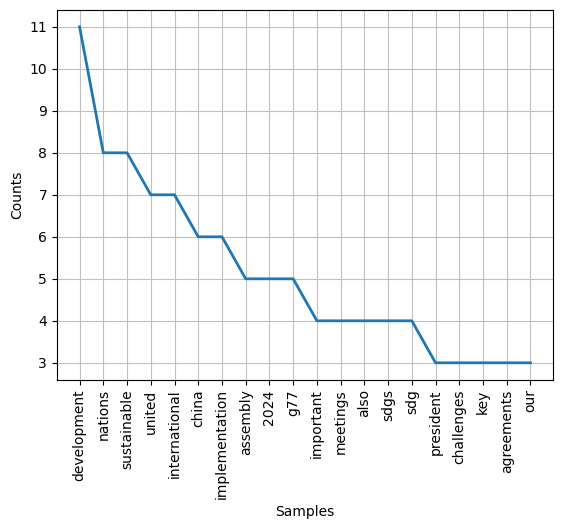

Axes(0.125,0.11;0.775x0.77)


In [24]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english') # Get a list of stopwords
new_stopwords = [',', '.', ';', 'of', 'group', 'the', 'a', 'in', 'and', 'to', 'on',
                 'for', 'that', 'with', 'this', 'all', 'is', 'you', 'they', 'we', 
                 'i', 'it', "'s", "n't", 'do', 'have', "'re", 'but', '?', 'were', 
                 'know', 'countries', 'as', 'should', 'be', 'general', 'these', 
                'developing', 'by', 'well', 'are', 'new', '(', ')', 
                'will', 'each'] 
stopwords.extend(new_stopwords) # Add new stopwords

new_list = []
for word in tokens:
    word=word.lower() #
    if word not in new_stopwords:
        new_list.append(word) # Tokens without stopwords 
        
fdist2 = FreqDist(new_list)
print(fdist2.most_common(20))
print(fdist2.plot(20))

4. Here is a link to a speech made by President Trump on January 6: https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial. Not all of the text is his speech. Some of the text is the analysis. Please extract Donald Trumps speech only, remove stopwords and perform a word frequency distribution and visualize it. 

In [26]:
#Your code here:
url = "https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial"
response = requests.get(url)

In [28]:
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser') 
    # get all the p tags
    paragraphs = soup.find_all('p')
    # extract and concatenate all the text from each paragraph
    statement_text = '\n'.join([paragraph.text for paragraph in paragraphs]) # '\n' - end of the line 
    #print(statement_text)
    s = "The video contains profanity." # This was the last line before the speech
    line = statement_text.strip()
    a = line.split(s)
    #print(a[1])
    trump_speech = a[1]
    #print(trump_speech)
    #print(paragraphs)
    
    #.strip()
else:
    print('Fail to retrieve') 
    
#print(trump_speech)

[('you', 264), ('they', 249), ('we', 240), ('i', 219), ('do', 127), ('have', 110), ('our', 85), ('people', 84), ('but', 83), ('going', 73), ('want', 67), ('was', 66), ('what', 64), ('were', 60), ('know', 58), ('so', 58), ('them', 55), ('be', 54), ('by', 53), ('there', 52)]


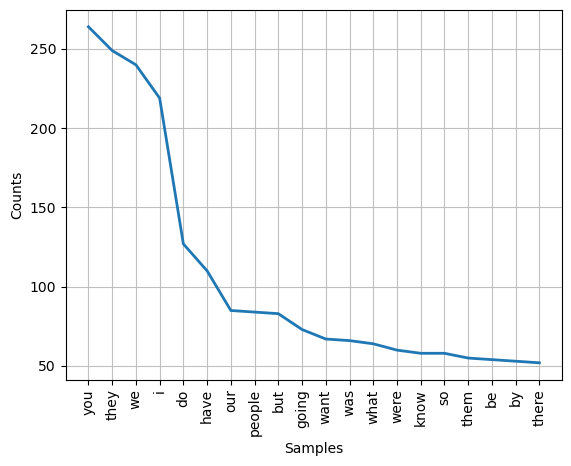

Axes(0.125,0.11;0.775x0.77)


In [29]:
tokens = word_tokenize(trump_speech)
#print(tokens)

from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
new_stopwords = [',', '.', ';', 'of', 'group', 'the', 'chapter', 'a', 'in', 'and', 'to', 'on',
                 'for', 'that', 'with', 'this', 'all', 'is', 'it', '?', "'s", "n't", "'re", 'not']
stopwords.extend(new_stopwords)

new_list = []
for word in tokens:
    word=word.lower() #
    if word not in new_stopwords:
        new_list.append(word)
        
fdist2 = FreqDist(new_list)
print(fdist2.most_common(20))
print(fdist2.plot(20))     

[('you', 264), ('they', 249), ('we', 240), ('i', 219), ('people', 84), ('want', 67), ('election', 44), ('country', 43), ('ballots', 43), ('votes', 41), ('back', 40), ('state', 36), ('right', 33), ('think', 33), ('like', 32), ('way', 32), ('will', 31), ('say', 31), ('never', 30), ('vote', 30)]


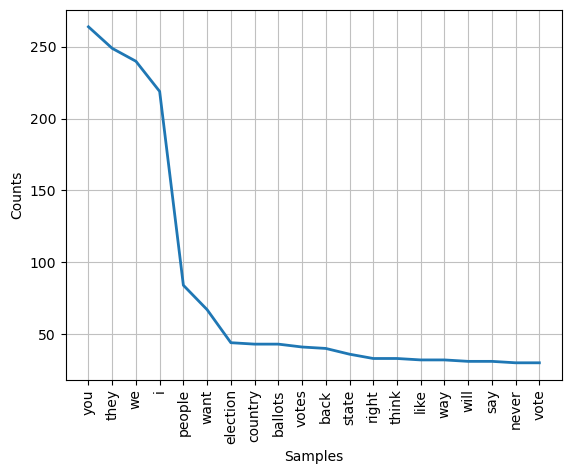

Axes(0.125,0.11;0.775x0.77)


In [40]:
# I tried adding more stop words 
stopwords = nltk.corpus.stopwords.words('english')
new_stopwords = [',', '.', ';', 'of', 'group', 'the', 'chapter', 'a', 'in', 'and', 'to', 'on',
                 'for', 'that', 'with', 'this', 'all', 'is', 'it', '?', "'s", "n't", "'re", 'not',
                 'do', 'have', 'our', 'going', 'but', 'was', 'are', 'be', 'by', 'what', 'were',
                 'so', 'them', 'there', 'had', '``', "''", 'because', 'if', 'he', 'know', 'get',
                 'got', "'ve", 'no', 'one', 'did', 'said', 'than', 'just', 'out', 'go', 'more',
                 'let', 'these', 'over'
                ]
stopwords.extend(new_stopwords)

new_list = []
for word in tokens:
    word=word.lower() #
    if word not in new_stopwords:
        new_list.append(word)
        
fdist2 = FreqDist(new_list)
print(fdist2.most_common(20))
print(fdist2.plot(20))     

5. Here is a link to a github repo that contains Donald Trump's speeches: https://github.com/ryanmcdermott/trump-speeches/blob/master/speeches.txt

What are the 10 most common things Donald Trump "loves?"



In [ ]:
#Your code here:

In [47]:
url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"
response = requests.get(url)
#print(response.content)
trump_text = response.content
trump_text = trump_text.decode('UTF-8')
#print(trump_text)
#print(trump_text.replace('\', ''))
#for line in trump_text:
    #line = line.replace('\r', '')

In [349]:
#trump_text

In [48]:
tokens = word_tokenize(trump_text) # Tokenize
# no back slash...

[('i', 6239), ('we', 3992), ('you', 3529), ('they', 3081), ('have', 2265), ('going', 2055), ('re', 1928), ('so', 1546), ('but', 1412), ('people', 1336), ('he', 1331), ('know', 1315), ('be', 1184), ('do', 1067), ('was', 982), ('what', 946), ('because', 775), ('said', 773), ('m', 772), ("''", 769)]


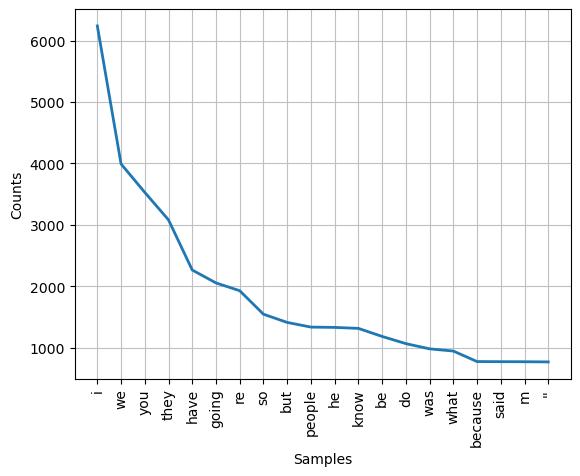

Axes(0.125,0.11;0.775x0.77)


In [49]:
tokens = word_tokenize(trump_text)
#print(tokens)

from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
new_stopwords = [',', '.', ';', 'of', 'group', 'the', 'chapter', 'a', 'in', 'and', 'to', 'on',
                 'for', 'that', 'with', 'this', 'all', 'is', 'it', '?', "'s", "n't", "'re", 'not',
                 '’', 's', '–', 'our', 'are', 't', '``', 'don']
stopwords.extend(new_stopwords)

new_list = []
for word in tokens:
    word=word.lower() #
    if word not in new_stopwords:
        new_list.append(word)
        
fdist2 = FreqDist(new_list)
print(fdist2.most_common(20))
print(fdist2.plot(20))     

[('very', 721), ('great', 687), ('country', 535), ('now', 517), ('money', 390), ('$', 385), ('time', 280), ('trump', 279), ('win', 279), ('then', 279), ('other', 278), ('their', 277), ('love', 275), ('did', 274), ('more', 272), ('well', 272), ('%', 271), ('big', 259), ('again', 245), ('things', 243)]


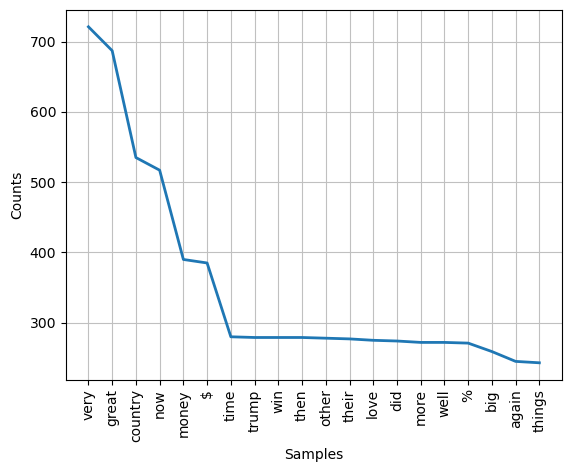

Axes(0.125,0.11;0.775x0.77)


In [50]:
# Remove 'i', 'we', 'you', 'they', 'have', 'going', 're', 'but', 'be', 'm', '"'
# and ordinary words 
new_stopwords = [',', '.', ';', 'of', 'group', 'the', 'chapter', 'a', 'in', 'and', 'to', 'on',
                 'for', 'that', 'with', 'this', 'all', 'is', 'it', '?', "'s", "n't", "'re", 'not',
                 '’', 's', '–', 'our', 'are', 't', '``', 'don',
                'i', 'we', 'you', 'they', 'have', 'going', 're', 'but', 'be', 'm', '"',
                'so', 'people', 'he', 'know', 'do', 'was', 'what', 'because', 'said', "''", 
                'me', 'get', 'can', 'about', 've', 'if', 'them', '—', 'at', 'will', 'just',
                'want', 'like', 'think', 'by', 'up', 'these', 'look', 'll', 'been', 'go', 'she', 'from',
                'my', 'many', 'had', 'one', 'say', 'there', 'no', 'got', 'who', 'make', 'an', 'or',
                'right', 'out', 'when', 'lot', 'good', 'really', 'has', 'back', 'as', 'us', 'way', 'would', 
                'mean', 'much', 'over', 'even', 'take', 'here', 'than', 'some', 'see', 'never', 'tell',
                'how', 'doing']
stopwords.extend(new_stopwords)

new_list = []
for word in tokens:
    word=word.lower() #
    if word not in new_stopwords:
        new_list.append(word)
        
fdist2 = FreqDist(new_list)
print(fdist2.most_common(20))
print(fdist2.plot(20))     

In [382]:
# Was not telling much 

In [51]:
what_trump_loves=[] # borrowed some idea from Rosemary 
#who_trump=[]
i=0
while i < len(new_list):
    if new_list[i] == 'love' or new_list[i] == 'loves' or new_list[i] == 'loved':
        what_trump_loves.append(new_list[i+1])
        #who_trump.append(new_list[i-1])
    i+=1 
print(what_trump_loves)
#print(who_trump)

['iowa', 'loved', 'those', 'donald', 'come', "'ve", 'coming', 'runs', "'m", 'care', 'nevada', 'nevada', 'florida', 'rifle', 'second', 'more', 'evangelicals', 'liberty', 'poorly', 'country', 'country', 'place', 'state', 'las', 'folks', 'love', 'speech', 'military', 'love', 'great', 'him', 'life', 'more', 'china', 'china', 'their', 'saudis', 'father', 'pundits', 'proud', 'john', 'republican', 'love', 'setting', 'talk', 'too', 'love', 'love', 'every', 'room', 'negotiating', 'getting', 'polls', 'polls', 'story', 'concept', 'love', 'love', 'having', 'their', 'care', 'their', 'only', 'guys', 'their', 'china', 'mexico', 'miss', 'universe', 'amazing', 'blue-collar', 'area', 'more', 'area', 'honor', 'sent', 'love', 'ahead', 'mexico', 'mexico', 'china', 'countries', 'countries', 'love', 'problem', 'second', 'cherishes', 'military', 'military', 'police', 'police', 'vets', 'may', 'their', 'express', 'room', 'israel', 'israel', 'country', 'country', 'express', 'place', 'hope', 'billy', 'remember', 

# comments and doc strings

6. Which are the top 5 countries Trump mentions in his speeches, besides America or the United States of America?

In [ ]:
#Your code here:

In [52]:
!pip install pycountry

In [55]:
import pycountry

In [56]:
country_list=[]
for country in pycountry.countries: # List of countries 
    if country.name in trump_text:
        country_list.append(country.name)
        #print(country.name)
print(country_list)        

['Afghanistan', 'Australia', 'Brazil', 'Canada', 'China', 'Cuba', 'Germany', 'Denmark', 'Egypt', 'Spain', 'France', 'Georgia', 'Greece', 'India', 'Ireland', 'Iraq', 'Israel', 'Jersey', 'Jordan', 'Japan', 'Kenya', 'Lebanon', 'Libya', 'Mexico', 'Norway', 'Pakistan', 'Poland', 'Qatar', 'Saudi Arabia', 'Sweden', 'Ukraine', 'United States', 'Viet Nam', 'Yemen']


[('China', 200), ('Mexico', 155), ('Israel', 82), ('Iraq', 69), ('Japan', 64), ('Germany', 16), ('Libya', 13), ('Yemen', 13), ('Afghanistan', 10), ('Jersey', 10), ('France', 10), ('Georgia', 8), ('Ukraine', 7), ('Qatar', 6), ('Canada', 6), ('Ireland', 5), ('Sweden', 5), ('Denmark', 4), ('Norway', 4), ('Pakistan', 3)]


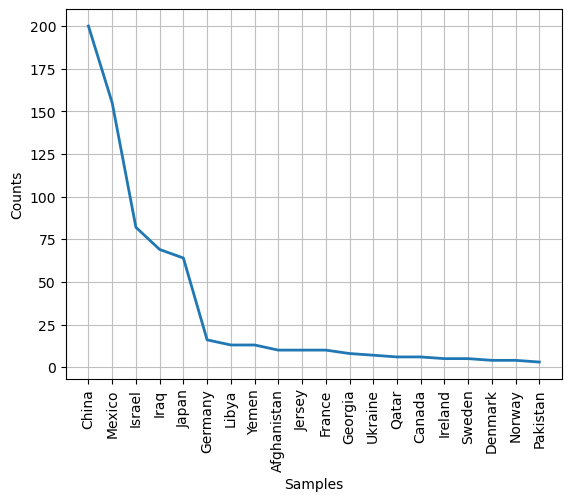

Axes(0.125,0.11;0.775x0.77)


In [57]:
tokens = word_tokenize(trump_text)
country_text = []
for word in tokens:
    if word in country_list:
        country_text.append(word)
#print(country_text)        
fdist2 = FreqDist(country_text)
print(fdist2.most_common(20))
print(fdist2.plot(20))  

In class we talked about sentence tokenizers that could be useful in determining when sentences might be repeated. One application we discussed was in political speeches, when certain sentences or phrases are repeated to show a candidates coaching, focus or in marketing terms, "messaging." Here is an analyis from https://www.vox.com/2016/8/18/12423688/donald-trump-speech-style-explained-by-linguists of the "salesman" techniques that Trump uses:
"Trump’s speeches can be appealing because he uses a lot of salesmen’s tricks. Lakoff, for his part, has an explanation for why Trump’s style of speaking is so appealing to many. Many of Trump’s most famous catchphrases are actually versions of time-tested speech mechanisms that salesmen use. They’re powerful because they help shape our unconscious. Take, for example, Trump’s frequent use of "Many people are saying..." or "Believe me" — often right after saying something that is baseless or untrue. This tends to sound more trustworthy to listeners than just outright stating the baseless claim, since Trump implies that he has direct experience with what he’s talking about. At a base level, Lakoff argues, people are more inclined to believe something that seems to have been shared. Or when Trump keeps calling Clinton "crooked," or keeps referring to terrorists as "radical Muslims," he’s strengthening the association through repetition. He also calls his supporters "folks," to show he is one of them (though many politicians employ this trick). Trump doesn’t repeat phrases and adjectives because he is stalling for time, Liberman says; for the most part, he’s providing emphasis and strengthening the association.
These are normal techniques, particularly in conversational speech. "Is he reading cognitive science? No. He has 50 years of experience as a salesman who doesn’t care who he is selling to," Lakoff says. On this account, Trump uses similar methods in his QVC-style pitch of steaks and vodka as when he talks about his plan to stop ISIS."He has been doing this for a very long time as a salesman — that’s what he is best at," Lakoff says."


7. Perform a frequency analysis that provides evidence for the assertion made in the Vox article. 

Consider tokenizing by unigram (one word), bigram(two words), trigram(three words) or more, or whole sentences or multiple approaches that help us understand the most common Trump linguistic characteristcs. Use your evidence and words to describe what you found. This is a fairly open ask. Don't just execute code. Tell me and show me something interesting!


In [ ]:
#Your code here:

In [58]:
import nltk
from nltk import ngrams

In [ ]:
# short sentences
# emphasis

In [60]:
tokens = word_tokenize(trump_text) # Tokenize

In [61]:
stopwords = nltk.corpus.stopwords.words('english')
new_stopwords = [',', '.', ';', 'of', 'group', 'the', 'chapter', 'a', 'in', 'and', 'to', 'on',
                 'for', 'that', 'with', 'this', 'all', 'is', 'it', '?', "'s", "n't", "'re", 'not',
                 '’', 's', '–', 'our', 'are', 't', '``', 'don', 'going',
                'you', 'we', 're', "'", "''", 'i', 'll', 'they',
                'at', 've', 'would', 'been', 'me', 'but', ] # added 'going'
# don't need subject words to see the speech pattern -> removed, you, they, we
stopwords.extend(new_stopwords)

new_list = []
for word in tokens:
    word=word.lower() #
    if word not in new_stopwords:
        new_list.append(word)

In [63]:
trigrams = nltk.trigrams(new_list) # Chose trigrams since bigrams would be too short
fdist2 = FreqDist(trigrams)

[(('thank', 'very', 'much'), 57), (('make', 'america', 'great'), 46), (('america', 'great', 'again'), 44), (('$', '1', 'million'), 31), (('$', '150', 'billion'), 27), (('so', 'many', 'people'), 24), (('just', 'came', 'out'), 22), (('know', 'what', 'doing'), 20), (('as', 'an', 'example'), 20), (('have', 'so', 'many'), 19), (('have', 'no', 'choice'), 19), (('$', '6', 'million'), 19), (('very', 'much', 'everybody'), 17), (('so', 'much', 'money'), 16), (('m', 'only', 'one'), 16), (('have', 'no', 'idea'), 16), (('$', '19', 'trillion'), 16), (('make', 'country', 'great'), 15), (('than', 'ever', 'before'), 15), (('take', 'care', 'vets'), 15)]


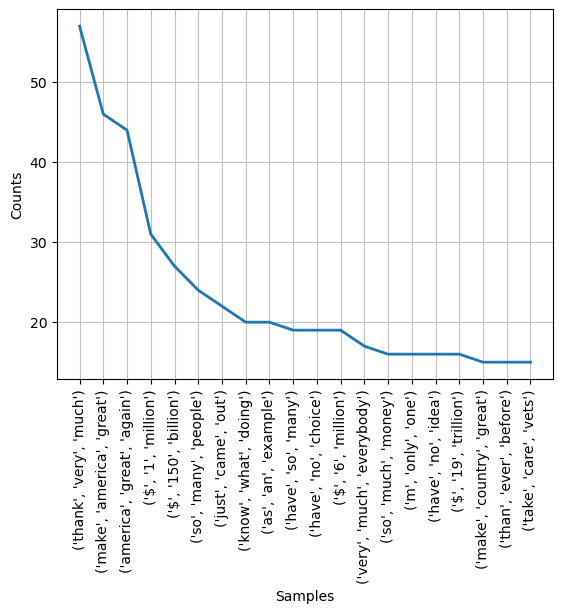

Axes(0.125,0.11;0.775x0.77)


In [64]:
print(fdist2.most_common(20))
print(fdist2.plot(20)) 

In [67]:
from collections import Counter

In [69]:
n = 5
text_1=trump_text
ngrams_func = ngrams(text_1.split(), n)

#for gram in ngrams_func:
    #print(gram)
    
word_freq = Counter(ngrams_func)
word_freq.most_common(10)
# stop words 

# count the frequency of elements in list

# try by sentences - short sentences, anyways

[(('going', 'to', 'take', 'care', 'of'), 33),
 (('I', 'think', 'we’re', 'going', 'to'), 26),
 (('to', 'take', 'care', 'of', 'our'), 26),
 (('going', 'to', 'pay', 'for', 'the'), 15),
 (('going', 'to', 'get', 'rid', 'of'), 15),
 (('in', 'the', 'history', 'of', 'the'), 15),
 (('and', 'it’s', 'going', 'to', 'be'), 14),
 (('going', 'to', 'be', 'able', 'to'), 14),
 (('to', 'make', 'America', 'great', 'again.'), 13),
 (('We’re', 'going', 'to', 'make', 'our'), 13)]

8.Sentiment Analysis
Sentiment analysis, also known as opinion mining or emotion AI, is a field of natural language processing (NLP) that focuses on identifying and categorizing opinions or sentiments expressed within text data. The primary goal is to determine the writer's or speaker's attitude towards a particular topic, product, service, or overall context. This attitude can range from positive, negative, to neutral, and may also encompass more nuanced emotions like happiness, anger, sadness, quantitative or emotional.


The most basic form of sentiment analysis assigns values to words based on a dictionary of words, from neutral to slightly positive or negative, moderately positive or negative, and extremely positive or negative. Vader is a popular package that analyzes sentiment.

In [71]:
#run this
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


This will compute a compound score by summing the valence scores of each word int he lexicon and then bnormalized between -1 (most negative) and +1 most positive. This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a "normalize, weighted composite score" is accurate.

let's test opur first sentiment using VADER. VADER is great on social media data which can be messy and contain emojis.
We will use the polarity_scores( ) method to obtain the polarity indices.

In [72]:
sentence = "I love that movie!"
score = analyzer.polarity_scores(sentence)
print(score)

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.6696}


In [73]:
sentence2 = "OMG, this job totally SUX!!"
score = analyzer.polarity_scores(sentence2)
print(score)

{'neg': 0.507, 'neu': 0.493, 'pos': 0.0, 'compound': -0.6261}


In [74]:
sentence3 = '😀' #command+control+space brings up emoji'
score = analyzer.polarity_scores(sentence3)
print(score)

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}


In [75]:
sentence4 = '😀 😀 😀 😀 😀' #command+control+space brings up emoji'
score = analyzer.polarity_scores(sentence4)
print(score)

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.8885}


The global financial crisis (GFC) refers to the period of extreme stress in global financial markets and banking systems between mid 2007 and early 2009. During the GFC, a downturn in the US housing market was a catalyst for a financial crisis that spread from the United States to the rest of the world through linkages in the global financial system. Many banks around the world incurred large losses and relied on government support to avoid bankruptcy. Millions of people lost their jobs as the major advanced economies experienced their deepest recessions since the Great Depression in the 1930s.

The Federal Reserve conference calls are a good way to track the sentiment that the Fed had toward the crisis. Did they know how bad it was? Did they think they could fix it? Starting in January of 2008, ending in October of 2008 map the sentiment of the Fed reserve calls.

Here are your documents:
Jan 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf
Mar 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf
July 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf
Sept 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf
Oct 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf


You will need to convert these pdf into text to process. 
1. Perform a word frequency analysis of each of the calls. Don't forget to remove stopwords.
2. Find and present any evidence that the Fed understands that what the US and world is going through is unlike anything that has ever before been experienced. What are the key phrases that convey this idea? How do you find them? Can you use a vector based approach or would you use a custom dictionary?
3. Extract any evidence that they thought that the situation could be quickly remedied and would not get as bad as it ended up gettting.
4. Parse the key participants and plot their sentiment over time. Who is the most positive? Who is the most negative? Who changes the most?
5. Add key makers to your visualization that bring in the key events of 2008.


In [ ]:
#Your code here

1. Perform a word frequency analysis of each of the calls. Don't forget to remove stopwords.

In [76]:
!pip install PyPDF2 

In [78]:
import PyPDF2 # To downloaded pdfs 
from PyPDF2 import PdfReader

In [80]:
files=['FOMC20080121confcall.pdf',
       'FOMC20080310confcall.pdf',
       'FOMC20080724confcall.pdf', 
       'FOMC20080929confcall.pdf',
       'FOMC20081007confcall.pdf']

In [81]:
#all_text=""
dict1={}
for file in files:
    file_obj = open(file, 'rb')
    file_reader = PyPDF2.PdfReader(file_obj)
    page=2 # Read from page 3
    text=""
    while page < len(file_reader.pages): 
        pageObj = file_reader.pages[page]
        text += pageObj.extract_text()
        page+=1
        
    new_text = ''.join(text.split('\n'))
    dict1[file[4:10]] = new_text    

[('have', 127), ('this', 92), ('think', 89), ('markets', 67), ('will', 65), ('very', 63), ('market', 61), ('chairman', 57), ('would', 56), ('what', 55), ('there', 52), ('some', 50), ('if', 49), ('financial', 47), ('our', 47), ('do', 45), ('now', 44), ('going', 43), ('inflation', 42), ('thank', 41)]


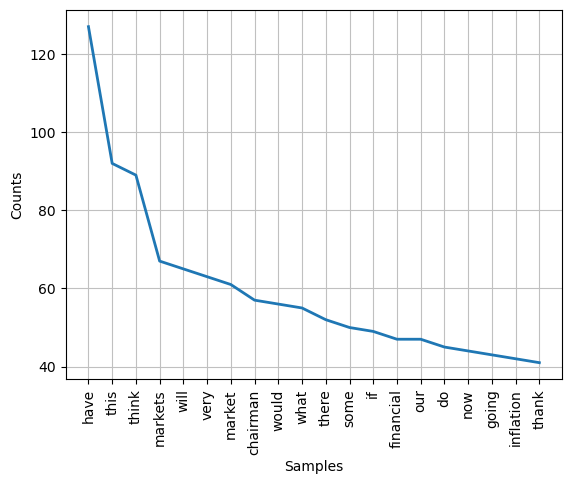

Axes(0.125,0.11;0.775x0.77)


In [83]:
# Jan 2008
jan_2008 = dict1['200801']
tokens = word_tokenize(jan_2008) # by each word???
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

new_stopwords = [',', '.', '’', 'mr.', 'the', 'to', 'of', 'that', 'i', 
                'and', 'a', 'in', 'is', 'are', 'it', 'as', 'for', 't', 'on',
                'but', 'you', 'we', 'be', 'about', 'at', 'with', 'so', 'not']
stopwords.extend(new_stopwords)

new_list = []
for word in tokens:
    word=word.lower() #
    if word not in new_stopwords:
        new_list.append(word)
        
fdist2 = FreqDist(new_list)
print(fdist2.most_common(20))
print(fdist2.plot(20))  

[('this', 175), ('have', 140), ('would', 90), ('think', 86), ('chairman', 77), ('will', 74), ('market', 73), ('do', 62), ('s', 60), ('securities', 57), ('there', 55), ('?', 53), ('markets', 52), ('collateral', 51), ('if', 49), ('what', 46), ('can', 45), ('our', 45), ('president', 44), ('other', 43)]


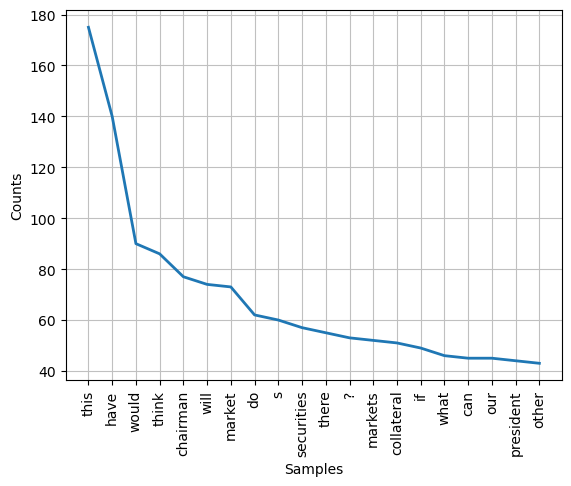

Axes(0.125,0.11;0.775x0.77)


In [84]:
# Mar 2008
mar_2008 = dict1['200803']
tokens = word_tokenize(mar_2008) 
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

new_stopwords = [',', '.', '’', 'mr.', 'the', 'to', 'of', 'that', 'i', 
                'and', 'a', 'in', 'is', 'are', 'it', 'as', 'for', 't', 'on',
                'but', 'you', 'we', 'be', 'about', 'at', 'with', 'so', 'not']
stopwords.extend(new_stopwords)

new_list = []
for word in tokens:
    word=word.lower() #
    if word not in new_stopwords:
        new_list.append(word)
        
fdist2 = FreqDist(new_list)
print(fdist2.most_common(20))
print(fdist2.plot(20))  

[('have', 202), ('would', 173), ('this', 152), ('think', 122), ('s', 95), ('if', 91), ('chairman', 85), ('our', 85), ('will', 84), ('they', 83), ('do', 80), ('these', 78), ('collateral', 77), ('president', 77), ('just', 71), ('more', 70), ('credit', 69), ('there', 68), ('some', 66), ('?', 65)]


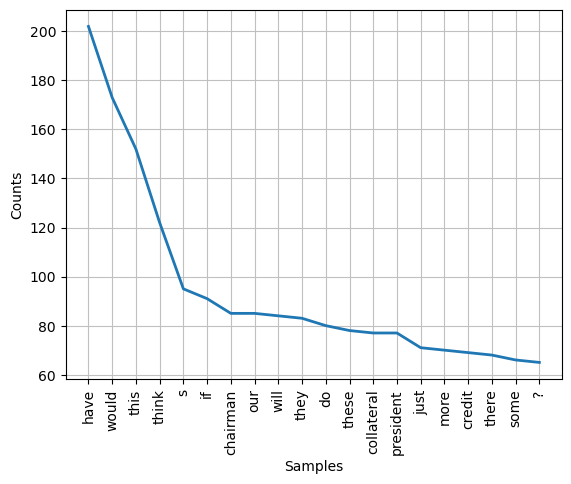

Axes(0.125,0.11;0.775x0.77)


In [85]:
# July 2008
july_2008 = dict1['200807']
tokens = word_tokenize(july_2008) 
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

new_stopwords = [',', '.', '’', 'mr.', 'the', 'to', 'of', 'that', 'i', 
                'and', 'a', 'in', 'is', 'are', 'it', 'as', 'for', 't', 'on',
                'but', 'you', 'we', 'be', 'about', 'at', 'with', 'so', 'not']
stopwords.extend(new_stopwords)

new_list = []
for word in tokens:
    word=word.lower() #
    if word not in new_stopwords:
        new_list.append(word)
        
fdist2 = FreqDist(new_list)
print(fdist2.most_common(20))
print(fdist2.plot(20))  

[('$', 67), ('billion', 65), ('s', 45), ('chairman', 41), ('have', 41), ('?', 39), ('this', 31), ('was', 30), ('there', 29), ('would', 28), ('they', 25), ('from', 23), ('bernanke', 22), ('reserves', 22), ('re', 22), ('rate', 22), ('or', 21), (';', 21), ('market', 20), ('bank', 20)]


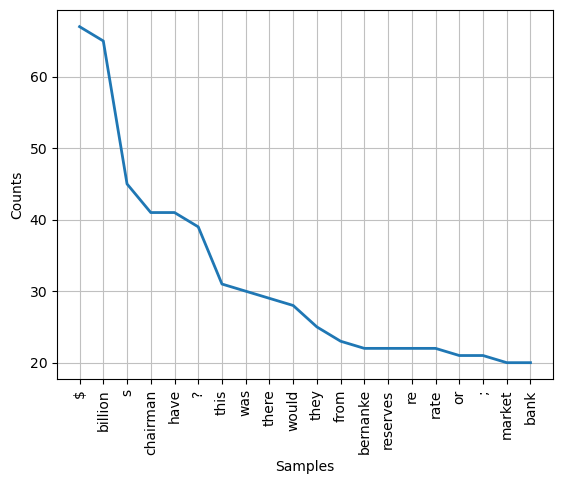

Axes(0.125,0.11;0.775x0.77)


In [86]:
# Sept 2008
sept_2008 = dict1['200809']
tokens = word_tokenize(sept_2008) 
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

new_stopwords = [',', '.', '’', 'mr.', 'the', 'to', 'of', 'that', 'i', 
                'and', 'a', 'in', 'is', 'are', 'it', 'as', 'for', 't', 'on',
                'but', 'you', 'we', 'be', 'about', 'at', 'with', 'so', 'not']
stopwords.extend(new_stopwords)

new_list = []
for word in tokens:
    word=word.lower() # Lowercase
    if word not in new_stopwords:
        new_list.append(word)
        
fdist2 = FreqDist(new_list)
print(fdist2.most_common(20))
print(fdist2.plot(20))  

[('have', 108), ('s', 101), ('think', 82), ('this', 80), ('chairman', 73), ('has', 64), ('thank', 45), ('will', 45), ('financial', 45), ('inflation', 44), ('would', 43), ('there', 43), ('our', 41), ('markets', 40), ('market', 39), ('going', 38), ('been', 36), ('some', 36), ('what', 35), ('bernanke', 34)]


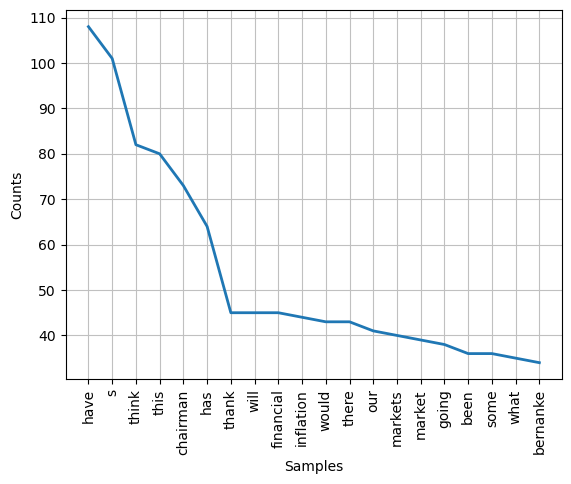

Axes(0.125,0.11;0.775x0.77)


In [87]:
# Oct 2008
oct_2008 = dict1['200810']
tokens = word_tokenize(oct_2008) 
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

new_stopwords = [',', '.', '’', 'mr.', 'the', 'to', 'of', 'that', 'i', 
                'and', 'a', 'in', 'is', 'are', 'it', 'as', 'for', 't', 'on',
                'but', 'you', 'we', 'be', 'about', 'at', 'with', 'so', 'not']
stopwords.extend(new_stopwords)

new_list = []
for word in tokens:
    word=word.lower() # Lowercase
    if word not in new_stopwords:
        new_list.append(word)
        
fdist2 = FreqDist(new_list)
print(fdist2.most_common(20))
print(fdist2.plot(20))  

2. Find and present any evidence that the Fed understands that what the US and world is going through is unlike anything that has ever before been experienced. What are the key phrases that convey this idea? How do you find them? Can you use a vector based approach or would you use a custom dictionary?

In [90]:
# phrases -> ngram 

all_text_2008=""
for file in files:
    file_obj = open(file, 'rb')
    file_reader = PyPDF2.PdfReader(file_obj)
    n=2
    text=""
    while n < len(file_reader.pages): 
        pageObj = file_reader.pages[n]
        text += pageObj.extract_text()
        n+=1
        
    new_text = ''.join(text.split('\n')) 
    all_text_2008+=new_text    
#print(all_text_2008)

In [91]:
from nltk.tokenize import sent_tokenize

In [92]:
#sentences = ngrams(all_text.split(), n)
sentences = sent_tokenize(all_text)

dict_sentence={}
dict_sentence_neg={}
for sentence in sentences:
    score = analyzer.polarity_scores(sentence)
    dict_sentence[sentence] = score
    dict_sentence_neg[sentence]=score['neg']

In [316]:
sorted(dict_sentence_neg.items(), key = lambda x:x[1], reverse=True) ## took from stackoverflow

[('I understand the arguments, and it is difficult to argue against dodging a crisis.',
  0.593),
 ('Am I mistaken?', 0.556),
 ('Problems with consumer debt are growing.', 0.525),
 ('So I am troubled.', 0.521),
 ('There are risks.', 0.512),
 ('We have to address this crisis.', 0.494),
 ('We could look panicky.', 0.455),
 ('First, troubled banks can be downgraded and fail very rapidly.', 0.448),
 ('We are protecting ourselves carefully, but not perfectly, against that risk.',
  0.438),
 ('Third, the problems in one financial market disturb others.', 0.435),
 ('It’s not like the 19 87 stock market crash or the 1970 commercial paper crisis.',
  0.426),
 ('Appreciable downside risks to growth remain.', 0.423),
 ('There are reputational risks.', 0.412),
 ('Has that risk been a particular problem for dealers?', 0.407),
 ('I am concerned also how severe a recession could be.', 0.403),
 ('I think it is absolutely right to worry that liquidity problems are escalating into solvency problems.',
 

I checked the sentences with highest negative score (>= 0.303). While there are sentences indicating the seriousness of the financial crisis, I did not find many sentences that describe the crisis as unprecedented. There was one sentence ('It’s not like the 19 87 stock market crash or the 1970 commercial paper crisis.",  0.426), which sounds like they saw that the crisis was different from the ones in 1987 and 1970. 

Sentences showing serious concern:
- 'I understand the arguments, and it is difficult to argue against dodging a crisis.', 0.593
- 'Problems with consumer debt are growing.', 0.525
- 'We have to address this crisis.', 0.494
- 'First, troubled banks can be downgraded and fail very rapidly.', 0.448
- 'Appreciable downside risks to growth remain.', 0.423
- 'I am concerned also how severe a recession could be.', 0.403
- 'I think it is absolutely right to worry that liquidity problems are escalating into solvency problems.', 0.397
- 'It is time to take decisive and aggressive action, and I agree that, even with this cut, downside risks remain.', 0.305
- 'Certainly, the September quart er-end was difficult, and the year-end was difficult.', 0.305
- 'But at this point we are facing , potentially , a broad -based crisis.', 0.303
- 'They have not made an explicit recession call, but they do forecast very weak growth going forward.', 0.258

A sentence that shows some optimism:

'But this risk should be controllable.', 0.346

In [93]:
# spaces between sentences

3. Extract any evidence that they thought that the situation could be quickly remedied and would not get as bad as it ended up gettting.

In [94]:
sentences = sent_tokenize(all_text_2008)

dict_sentence={}
dict_sentence_pos={}
for sentence in sentences:
    score = analyzer.polarity_scores(sentence)
    dict_sentence[sentence] = score
    dict_sentence_pos[sentence]=score['pos']

In [95]:
sorted(dict_sentence_pos.items(), key = lambda x:x[1], reverse=True) ## took from stackoverflow

[('Certainly.', 1.0),
 ('Yes.', 1.0),
 ('Okay.', 1.0),
 ('Thanks.', 1.0),
 ('Okay?', 1.0),
 ('Sure.', 1.0),
 ('Okay, good.', 1.0),
 ('But thanks.', 0.794),
 ('Thanks, Bill.', 0.744),
 ('Gee, thanks.', 0.744),
 ('Thanks, Brian.', 0.744),
 ('Good morning.', 0.744),
 ('Thanks, I appreciate that.', 0.737),
 ('Yes, sir.', 0.73),
 ('Yes, Brian.', 0.73),
 ('Thank you.', 0.714),
 ('Thank  you.', 0.714),
 ('But I strongly support this.', 0.674),
 ('Poetic justice .', 0.63),
 ('I strongly support this recommendation.', 0.615),
 ('I strongly support your proposal.', 0.615),
 ('[Laughter]   All right.', 0.615),
 ('President Rosengren  Yes   Governor Warsh  Yes  Thank you.', 0.612),
 ('Good afternoon, everybody.', 0.592),
 ('Good evening, everybody.', 0.592),
 ('Good morning, everybody.', 0.592),
 ('Thanks, Mr. Chairman.', 0.592),
 ('Thanks, Mr .', 0.592),
 ('I apologize.', 0.583),
 ('Yes, Mr. Chairman.', 0.574),
 ('Yes, I did.', 0.574),
 ('Chairman Bernanke    Yes Vice Chairman Geithner   Yes Pres

Sentences showing optimism:
- 'June was actually pretty manageable.', 0.444
- 'So far things are pretty calm on that front.', 0.44
- 'In other words, improvement in this area would make monetary policy more effective and would likely generate significant macroeconomic benefits.
- 'Going forward, I think there is some hope in the near term under the new TARP, which would allow resolutions using capital injections basically without necessarily doing a merger.', 0.146
- 'So we think we’re in a situation where we have a very important tool that will allow us to expand the balance sheet but maintain control of the federal funds rate.', 0.142
- 'While strains in short- term funding markets have eased somewhat , broader—add that word—financial market conditions have continued to deteriorate and credit has tightened further for some businesses and households.', 0.069
- 'In other words, improvement in this area would make monetary policy more effective and would likely generate significant macroeconomic benefits.'

4. Parse the key participants and plot their sentiment over time. Who is the most positive? Who is the most negative? Who changes the most?

In [102]:
#for word in tokens_to_find_names:

In [104]:
tokens_to_find_names = word_tokenize(all_text_2008)
acronym_list = ['CHAIRMAN', 'MBIA', 'MR', '32CHAIRMAN', 'U.S.',
                'FOMC', 'VICE', '–OIS', 'TSLF', 'AAA-', 'CDO-', 'TSLF-',
                'OMO-', '-OMO-', 'FDIC', '32MR', '39MR', 'CHAIR', '39VICE', '39CHAIRMAN',
                'CGFS', '–FOMC', 'PDCF', '50MR', '50CHAIRMAN', 'SCRM',
                '30MR', '30CHAIRMAN', '16MR', 'AMLF', 'A.G.',
                'PARTICIPANT', '16CHAIRMAN', 'U.K.', '50VICE', 'NYFR', 'U.S.-']
dict_possible_participants={}
list_possible_participants=[]

for word in tokens_to_find_names:
    if word.isupper()==True and len(word)>3 and word not in acronym_list and word not in dict_possible_participants:
        list_possible_participants.append(word) # Created a list of possible participants
#list_tokens_to_find_names"

In [105]:
# Created a dictionary of each name and the number of occurrences\n",
for each_word in list_possible_participants:
    dict_possible_participants[each_word]=tokens_to_find_names.count(each_word) 
    # print(dict_possible_participants)
    sorted(dict_possible_participants.items(), key = lambda x:x[1], reverse = True) # Find the name that appears the most\n",
key_participants = ['BERNANKE', 'DUDLEY', 'LACKER', 'LIBOR'] # Picked the top 4\n",
key_participants

In [ ]:
# Try with Jan 2008
tokens_jan_2008 = word_tokenize(jan_2008)
i=0
text_jan_2008=""
while i < 10: # while i < len(tokens_jan_2008):
    if tokens_jan_2008[i] in key_participants:
        j=i+1
        while tokens_jan_2008[j] not in key_participants:
            text_jan_2008+=tokens_jan_2008[j]
            j+=1
    # else:
    i+=1
        
print(text_jan_2008)

In [ ]:
# 5. Add key makers to your visualization that bring in the key events of 2008.

I 

9. Sentiment analysis is not a perfect science, especially when you are using off-the-shelf packages like VADER. Given what you know about the crisis, do you trust Vader's sentiment analysis? Why or why not?



#Your answer here:
No it is hard to define what the sentiment is toward. A statement could be positive in the context of the market in responding to other participants, which does not mean that the statement was positive about the market. 
For example, these sentences show negative views on the market, but their positive scores are high.
- 'The downside risks have clearly increased.', 0.44
- 'So there is no guarantee of success here.', 0.424


10. Can you reasonably determine whether a low or negative compound score indicates a negative sentiment from the Fed in 2008? Can you do so with data only from 2008?

Provide a reasonable comparison from 2008 values by comparing it to some other timeframe from the FED confernce call historic database. https://www.federalreserve.gov/monetarypolicy/fomc_historical_year.htm

In [ ]:
#Your code here:

Links: 2003, March 25 to April 16 

https://www.federalreserve.gov/monetarypolicy/files/FOMC20030325confcall.pdf
https://www.federalreserve.gov/monetarypolicy/files/FOMC20030401confcall.pdf
https://www.federalreserve.gov/monetarypolicy/files/FOMC20030408confcall.pdf
https://www.federalreserve.gov/monetarypolicy/files/FOMC20030416confcall.pdf

In [330]:
files = ['FOMC20030325confcall.pdf',
         'FOMC20030401confcall.pdf',
         'FOMC20030408confcall.pdf',
         'FOMC20030416confcall.pdf']

In [96]:
all_text_2003=""
for file in files:
    file_obj = open(file, 'rb')
    file_reader = PyPDF2.PdfReader(file_obj)
    n=2
    text=""
    while n < len(file_reader.pages): 
        pageObj = file_reader.pages[n]
        text += pageObj.extract_text()
        n+=1
        
    new_text = ''.join(text.split('\n')) 
    all_text_2003+=new_text    
#print(all_text_2003)

In [97]:
sentences_2003 = sent_tokenize(all_text_2003)
dict_sentence_2003={}
for sentence in sentences_2003:
    score = analyzer.polarity_scores(sentence)
    dict_sentence_2003[sentence] = score

In [99]:
sum_pos_2003=0
sum_neg_2003=0
sum_com_2003=0
counter_2003=0

for each_item in dict_sentence_2003.values():
    sum_pos_2003+=each_item['pos']
    sum_neg_2003+=each_item['neg']
    sum_com_2003+=each_item['compound']
    counter_2003+=1
print(sum_pos_2003/counter_2003)
print(sum_neg_2003/counter_2003)
print(sum_com_2003/counter_2003)

0.0926280510018216
0.04111803278688522
0.12574703096539142


In [100]:
sentences_2008 = sent_tokenize(all_text_2008)
dict_sentence_2008={}

for sentence in sentences_2008:
    score = analyzer.polarity_scores(sentence)
    dict_sentence_2008[sentence] = score

In [101]:
sum_pos_2008=0
sum_neg_2008=0
sum_com_2008=0
counter_2008=0

for each_item in dict_sentence_2008.values():
    sum_pos_2008+=each_item['pos']
    sum_neg_2008+=each_item['neg']
    sum_com_2008+=each_item['compound']
    counter_2008+=1
print(sum_pos_2008/counter_2008)
print(sum_neg_2008/counter_2008)
print(sum_com_2008/counter_2008)

0.0926280510018216
0.04111803278688522
0.12574703096539142


- 2008 documents have a higher value for the average negative score, a higher value for the average positive score, and a higher value for the averagae composite score than the conference calls in March 2003 to April 2003.
- Therefore, is it not the case that the higher negative score is related to lower composite score since the negative score is higher for 2008 than 2003 but the composite score is also higher for 2008 than for 2003.